# Part I - (Ford GoBikes Exploration)
#### by (Itunuoluwa A. Olowoye)
## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay, United states. The dataset can be downloaded [here](https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv).
> This project is aimed at exploring this dataset, understanding the trends of users of the bike sharing company.
## Preliminary Wrangling
The relevant Python packages (`pandas`, `numpy`, `matplotlib`, and `seaborn`) needed for the exploration of this dataset were imported and visualizations were set to be embedded inline within this notebook.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Data Assessment
The dataset is loaded into a pandas dataframe for programmatic data assessment and exploration. The important data properties were identified, the summary statistics were generated and plot matrices were created to determine important relationships between variables at a quick glance.

In [2]:
# load dataset into dataframe
bike_systems = pd.read_csv('201902-fordgobike-tripdata.csv')
bike_systems.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [3]:
# highlevel summary of dataset
bike_systems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### Data Cleaning
#### Define
The datatypes of the variables need to be changed to appropriate data types and this requires some brief data cleaning. Start and end times will be parsed to datetime format, all ids will be strings, and usertype will be category.
#### Code

In [4]:
# change datatypes of selected columns
bike_systems.start_time = pd.to_datetime(bike_systems.start_time, format='%Y-%m-%d %H:%M:%S')
bike_systems.end_time = pd.to_datetime(bike_systems.end_time, format='%Y-%m-%d %H:%M:%S')
bike_systems.start_station_id = bike_systems.start_station_id.astype('str')
bike_systems.end_station_id = bike_systems.end_station_id.astype('str')
bike_systems.bike_id = bike_systems.bike_id.astype('str')
bike_systems.user_type = bike_systems.user_type.astype('category')
bike_systems.member_gender = bike_systems.member_gender.astype('category')
bike_systems.bike_share_for_all_trip = bike_systems.bike_share_for_all_trip.astype('category')

#### Test

In [5]:
# datatypes
bike_systems.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
dtype: object

#### Define
The longitude and latitude of stations should be in `(x,y)` format where `x` is latitude and `y` is longitude.
#### Code

In [6]:
# turn latitude and longitude data columns into one location tuple
bike_systems['start_location'] = bike_systems[['start_station_latitude', 'start_station_longitude']].apply(tuple, axis=1)
bike_systems['end_location'] = bike_systems[['end_station_latitude', 'end_station_longitude']].apply(tuple, axis=1)

In [7]:
# drop individual longitude and latitude columns
bike_systems.drop(columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'],
                 inplace=True)

####  Test

In [8]:
# check columns and their data types
bike_systems.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
end_station_id                     object
end_station_name                   object
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
start_location                     object
end_location                       object
dtype: object

### Descriptive summary statistics

In [9]:
# summary statistics
bike_systems.describe()

,duration_sec,member_birth_year
count,183412.000000,175147.000000
mean,726.078435,1984.806437
std,1794.389780,10.116689
min,61.000000,1878.000000
25%,325.000000,1980.000000
50%,514.000000,1987.000000
75%,796.000000,1992.000000
max,85444.000000,2001.000000


### Relationship between variables
A `PairGrid` is used to plot the matrices of relationships between variables to identify any patterns present in the dataset.
#### Question
Any there any distinct identifiable patterns between variables?
#### Visualization

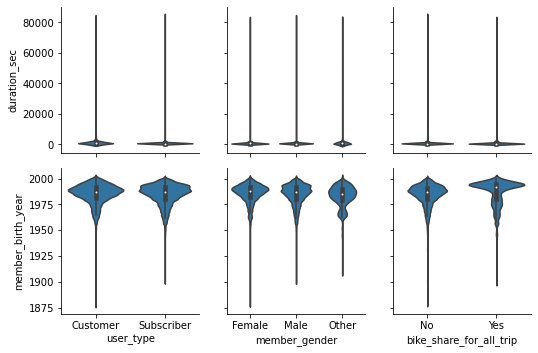

In [10]:
# plot matrices
g = sb.PairGrid(data = bike_systems, y_vars=['duration_sec', 'member_birth_year'],
               x_vars=['user_type', 'member_gender', 'bike_share_for_all_trip'])
g.map(sb.violinplot, color=sb.color_palette()[0])

### What is the structure of your dataset?

> There are more than 180,000 bike sharing rides. These rides are grouped by user type (customer or subscriber), gender (male, female, or other), and whether or not the bike was shared for all trips when moving from the start station to the end station. The duration of each ride is given in seconds and may be easier to visualize in hours. Most of the variables are discrete qualitative or categorical data. There are only two numeric values - `duration` and `birth year`.

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in:

    1. Knowing the most frequent bike starting stations and destinations.
    2. How long trips usually take and categorise by user type, gender and whether or not the bike was shared for most trips
    3. The age demographic of users also by user type, gender and whether or not the bike was shared for most trips
    4. Whether or not there is a relationship between age demographic and how long trips take

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the frequency of stations, the duration of trips and the different categorical data will help me drill down into this dataset. Some feature engineering will be needed for the trip duration and birth range/age to understand the long tails in the above violin plots.

## Univariate Exploration
### Question 1:
> What are the most frequent starting stations?

In [11]:
# how many starting stations are there?
bike_systems.start_station_name.nunique()

329

In [12]:
# how many trips were taken in each station?
def starting():
    plt.figure(figsize=[16,10])
    color = sb.color_palette()[0]
    sb.countplot(data=bike_systems, y='start_station_id', color=color)

>**Notice**: There are 329 starting bike stations and a rough look at how many times trips started from these stations show that bike stations where more than **1500 trips** start from are the highest. *The visualization is refined to show these highest starting stations.*

In [13]:
# define function to pull stations with highest trips
def highest(data):
    # count start station names
    stations = data.value_counts()

    # turn series to dataframe and rename columns
    df = stations.to_frame().reset_index()
    df.rename(columns={'index':'station', df.columns[1]:'count'}, inplace=True)

    # select stations with more than 1500 trips
    highest_stations = df.query('count > 1500')

    # dimension of dataframe
    return highest_stations

In [14]:
# start stations with highest trips
highest_start_station_names = highest(bike_systems.start_station_name)
highest_start_station_ids = highest(bike_systems.start_station_id)

#### Visualization:

In [15]:
# define function to plot bar chart
def barchart(dataframe1, dataframe2, title1, title2):
    # figure size
    plt.figure(figsize=[16,10])
    
    # bar color
    color = sb.color_palette()[0]
    
    # plot chart in descending order
    dataframe1 = dataframe1.sort_values('count', ascending=True)
    dataframe1.plot(kind='barh', x='station', y='count', width=0.8, color=color, legend=False)
    
    # add chart attributes
    plt.xlabel('Number of trips')
    plt.ylabel(None)
    plt.title(title1);
    
    dataframe2 = dataframe2.sort_values('count', ascending=True)
    dataframe2.plot(kind='barh', x='station', y='count', width=0.8, color=color, legend=False)
    
    # add chart attributes
    plt.xlabel('Number of trips')
    plt.ylabel(None)
    plt.title(title2)
    plt.show();

<Figure size 1152x720 with 0 Axes>

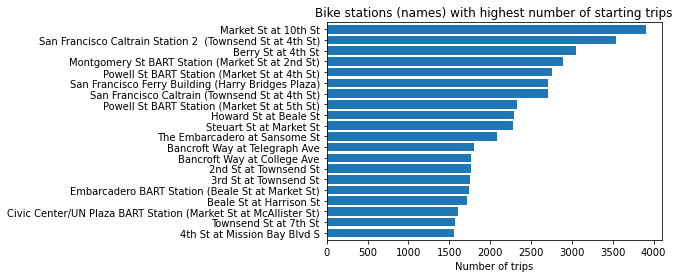

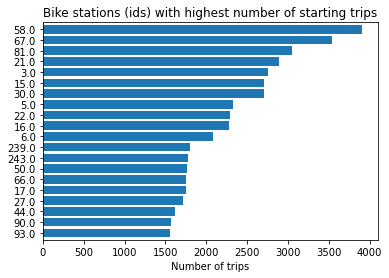

In [16]:
# bar chart of starting bike stations
dataframe1 = highest_start_station_names
title1 = 'Bike stations (names) with highest number of starting trips'
dataframe2 = highest_start_station_ids
title2 = 'Bike stations (ids) with highest number of starting trips'
barchart(dataframe1, dataframe2, title1, title2)

<h4 style='color:red'> Observation </h4>

> There are 329 starting bike stations and only 20 of them started more than 1500 trips.

> The top two start stations are station 58 (**Market St at 10th St**) and station 67(**San Francisco Caltrain Station 2 (Townsend St at 4th St))** respectively
#### Feature Engineering
> The count of starting bike stations was generated with the `value_counts` function and this was queried to select only stations with more than 1500 starting trips.

### Question 2:
> What are the most frequent end stations?

In [17]:
# how many destination stations are there?
bike_systems.end_station_name.nunique()

329

In [18]:
# how many trips were taken in each station?
def ending():
    plt.figure(figsize=[16,10])
    color = sb.color_palette()[0]
    sb.countplot(data=bike_systems, y='end_station_name', color=color)

>**Notice**: There are 329 destination bike stations and a rough look at how many times trips started from these stations show that bike stations where more than **1500 trips** end are the highest. *The visualization is refined to show these highest starting stations.*

In [19]:
# destination stations with highest trips
highest_end_station_name = highest(bike_systems.end_station_name)
highest_end_station_id = highest(bike_systems.end_station_id)

#### Visualization:

In [20]:
highest_end_station_id

,station,count
0,67.0,4857
1,58.0,3973
2,21.0,3647
3,15.0,3368
4,3.0,2997
5,30.0,2947
6,81.0,2872
7,6.0,2512
8,5.0,2353
9,16.0,2338


<Figure size 1152x720 with 0 Axes>

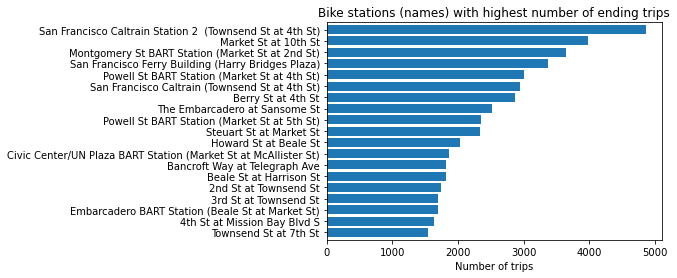

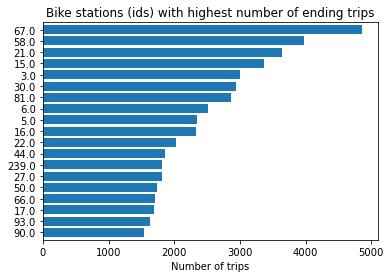

In [21]:
# bar chart of highest destination bike stations
# bar chart of starting bike stations
dataframe1 = highest_end_station_name
title1 = 'Bike stations (names) with highest number of ending trips'
dataframe2 = highest_end_station_id
title2 = 'Bike stations (ids) with highest number of ending trips'
barchart(dataframe1, dataframe2, title1, title2)

<h4 style='color:red'> Observation </h4>

> There are 329 starting and destination bike stations. All bike stations both start and end trips

> Only 20 of them were the destination more than 1500 trips.

> The top two destination stations are station 67 (**San Francisco Caltrain Station 2 (Townsend St at 4th St)**) and station 58 (**Market St at 10th St**) respectively

> In summary, `Market St at 10th St` **starts** the highest trips and `San Francisco Caltrain Station 2 (Townsend St at 4th St)` **ends** the highest trips.
#### Feature Engineering
> The count of destination bike stations was generated with the `value_counts` function and this was queried to select only stations with more than 1500 destination trips.

### Question 3:
> How many user types are available?

In [22]:
# how many usertypes are there?
bike_systems.user_type.nunique()

2

#### Visualization:

In [23]:
# define function to plot bar chart for categorical data
color=sb.color_palette()[0]
def cat_plot(data, title):
    # bar plot of proportion of user types
    df = data.value_counts(normalize=True, sort=True).to_frame().reset_index()
    sb.barplot(data=df, x='index', y=df.columns[1], color=color, order=df['index'])

    # plot attributes
    ticks = np.arange(0,1,0.1)
    plt.yticks(ticks=ticks)
    plt.ylabel('Proportion')
    plt.xlabel(None)
    plt.title(title);

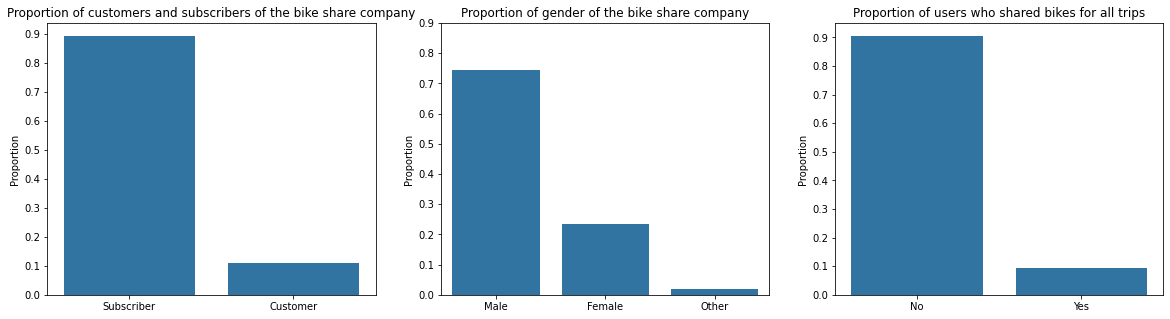

In [24]:
# create figure and subplots for the three categorical data
plt.figure(figsize = [20, 5]) 

# user type subplot
plt.subplot(1, 3, 1)
title = 'Proportion of customers and subscribers of the bike share company'
cat_plot(bike_systems['user_type'], title)

# gender subplot
plt.subplot(1, 3, 2)
title = 'Proportion of gender of the bike share company'
cat_plot(bike_systems['member_gender'], title)

# user type subplot
plt.subplot(1, 3, 3)
title = 'Proportion of users who shared bikes for all trips'
cat_plot(bike_systems['bike_share_for_all_trip'], title)

<h4 style='color:red'> Observation </h4>

> There are many subscribers, accounting for approximately 90% of users.
#### Feature Engineering
> The frequency was plotted as relative, rather than absolute, frequency

### Question 4:
> How long do trips take?

In [25]:
# change duration from seconds to hours
bike_systems['duration_hrs'] = bike_systems['duration_sec']/(60*60)

In [26]:
# check summary statistics
bike_systems.duration_sec.describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

#### Visualization:

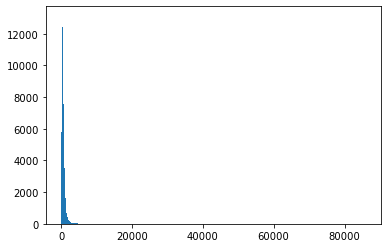

In [27]:
# histogram of trip duration
bins = np.arange(60, 86000, 50)
plt.hist(data=bike_systems, x='duration_sec', bins = bins);

In [28]:
# number of values greater than the mean
bike_systems.query('duration_sec > 726').shape

(54606, 15)

The data is heavily right-skewed and there are many values greater than the mean. Rather than attempt to remove outliers, we put it on a log-scale instead.

In [29]:
# summary statistics in log scale
np.log10(bike_systems['duration_sec'].describe())

count    5.263428
mean     2.860984
std      3.253917
min      1.785330
25%      2.511883
50%      2.710963
75%      2.900913
max      4.931682
Name: duration_sec, dtype: float64

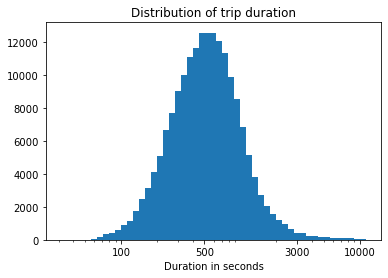

In [30]:
# histogram of trip duration in log scale
bins = 10 ** np.arange(1.5, 4+0.1, 0.05)
plt.hist(data=bike_systems, x='duration_sec', bins = bins)
plt.xscale('log')
ticks = [100,500,3000,10000]
plt.xticks(ticks, ticks)
plt.xlabel('Duration in seconds')
plt.title('Distribution of trip duration');

<h4 style='color:red'> Observation </h4>

> Trip duration has a long tail to the right, with most trips on the trip low duration end, less than 5000 secs. However, when plotted on a log-scale, it shows a unimodal normal distribution with the average trip duration close to 500 secs
#### Feature Engineering
> The trip duration column was transformed to log-scale.

### Question 5:
> What is the age demography of users?

In [31]:
# create age column from birth year range
bike_systems['age'] = 2019 - bike_systems['member_birth_year']

In [32]:
# check summary statistics
bike_systems.age.describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

#### Visualization:

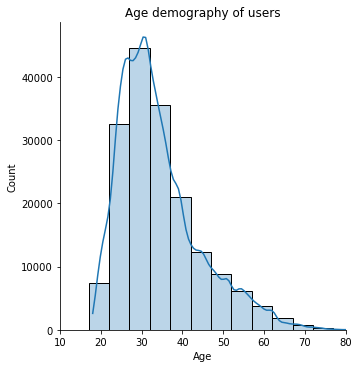

In [33]:
# histogram of age
bins = np.arange(17, 141+0.1, 5)
sb.displot(bike_systems['age'], bins = bins, kde = True, color=color, alpha=0.3)
plt.xlim(10,80)
plt.xlabel('Age')
plt.title('Age demography of users');

<h4 style='color:red'> Observation </h4>

> Most of the users are between 20 to 40 years old
#### Feature Engineering
> The birth year was converted to age and the histogram plotted was normalized

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

**Market St at 10th St** starts the most trips and **San Francisco Caltrain Station 2 (Townsend St at 4th St)** ends the most trips. Subscribers account for about 90% of the customer base. This customer base are more than 70% male, and most are between 20 to 40 years old.

Generally, trip duration is heavily skewed to the right with a log-normal distribution.

## Bivariate Exploration
### Question 6:
> Is there a relationship between the trip duration and age demography? Do older people take longer or shorter trips?
#### Visualization:
A heat map will be used to visualize this relationship. First, all rows with null entries of either columns are removed

In [34]:
# remove null entries
not_null = bike_systems[bike_systems.age.notnull()]

In [35]:
# create function for log transformation
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

In [36]:
# x-values for bins
not_null['duration_sec'].apply(log_trans).describe()

count    175147.000000
mean          2.707921
std           0.305277
min           1.785330
25%           2.509203
50%           2.707570
75%           2.897077
max           4.927103
Name: duration_sec, dtype: float64

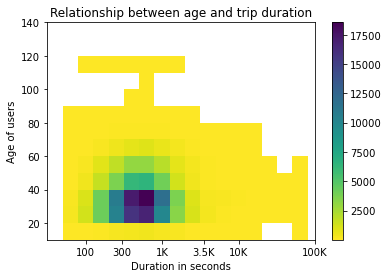

In [37]:
# heat map of duration and age
bins_y = np.arange(10, 150, 10)
bins_x = np.arange(1.5, 5+0.1, 0.2)
plt.hist2d(x=not_null['duration_sec'].apply(log_trans), y=not_null['age'], cmin=0.5, cmap='viridis_r', bins=[bins_x,bins_y])
plt.colorbar()
ticks = [100, 300, 1000, 3500, 10000, 100000]
labels = ['100', '300', '1K', '3.5K', '10K', '100K']
plt.xticks(log_trans(ticks), labels)
plt.xlabel('Duration in seconds')
plt.ylabel('Age of users')
plt.title('Relationship between age and trip duration');

<h4 style='color:red'> Observation </h4>

> A lot of users between 20 and 40 years old take trips that last between 300 and 1000 seconds.

> Older people from 80 years old and above do not take trips longer than 3500 seconds

### Question 7:
> Is there a relationship between the trip duration and usertype?
#### Visualization:
Violin and box plots will be used to visualize this relationship.

In [38]:
def viobox(x, violin_title, box_title, bar_title):
    # plot figure and subplots
    plt.figure(figsize=[16,5])

    #violin subplot
    plt.subplot(1,3,1)
    ax1 = sb.violinplot(x=x, y=bike_systems['duration_sec'].apply(log_trans), color=color)
    ticks = [100, 300, 1000, 3000, 10000, 100000]
    labels = ['100', '300', '1K', '3K', '10K', '100K']
    plt.yticks(log_trans(ticks), labels)
    plt.ylabel('Duration in seconds')
    plt.xlabel(None)
    plt.title(violin_title);

    #box subplot
    plt.subplot(1,3,2)
    sb.boxplot(x=x, y=bike_systems['duration_sec'].apply(log_trans), color=color)
    plt.yticks(log_trans(ticks), labels)
    plt.ylabel('Duration in seconds')
    plt.xlabel(None)
    plt.title(box_title);
    
    # bar chart subplot
    plt.subplot(1, 3, 3)
    sb.barplot(x=x, y=bike_systems['duration_sec'].apply(log_trans), color=color, ci='sd')
    plt.yticks(log_trans(ticks), labels)
    plt.ylabel('Duration in seconds')
    plt.xlabel(None)
    plt.title(bar_title);

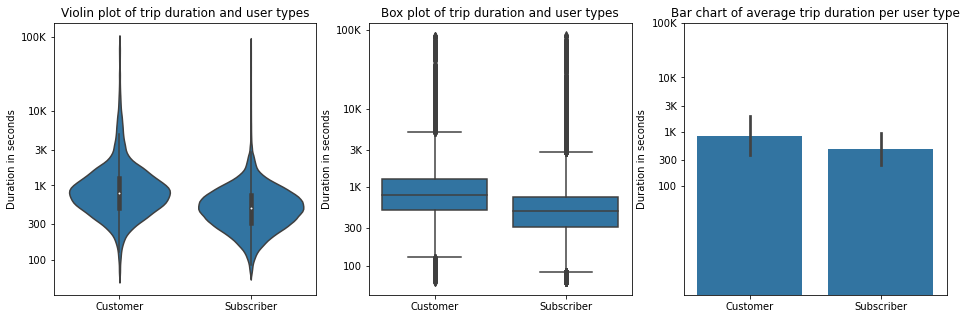

In [39]:
x=bike_systems['user_type']
violin_title = 'Violin plot of trip duration and user types'
box_title = 'Box plot of trip duration and user types'
bar_title = 'Bar chart of average trip duration per user type'
viobox(x, violin_title, box_title, bar_title)

<h4 style='color:red'> Observation </h4>

> There is a long tail towards higher trip durations but most of the distribution is between 300 and 3000 seconds. 

> The box plot shows that there are ununsually long trips (outliers) from 3000seconds and beyond.

> Subscribers spend on average a shorter time on trips compared to customers. Customers spend closer to 1000 seconds on trips than subscribers.

### Question 8:
> Is there a relationship between the trip duration and gender?
#### Visualization:
Violin and box plots will be used to visualize this relationship.

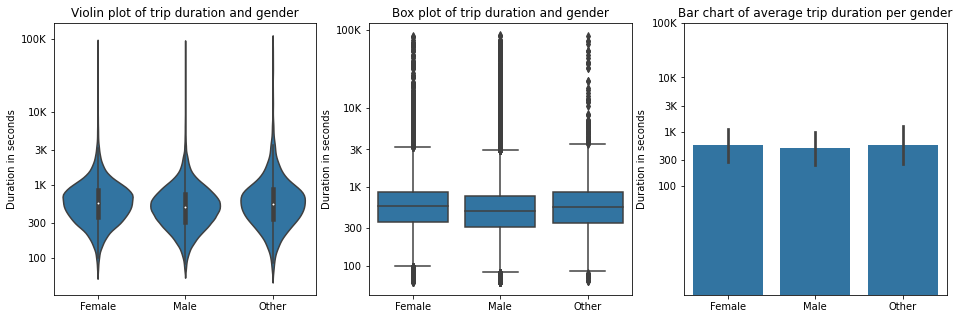

In [40]:
# bivariate plots of gender and trip duration
x=bike_systems['member_gender']
violin_title = 'Violin plot of trip duration and gender'
box_title = 'Box plot of trip duration and gender'
bar_title = 'Bar chart of average trip duration per gender'
viobox(x, violin_title, box_title, bar_title)

<h4 style='color:red'> Observation </h4>

> The distribution of trip duration per gender is similar. Males spend a slightly shorter time but there is no notable differences. Again, the outliers are from 3000seconds and above.

### Question 9:
> Is there a relationship between the trip duration and deciding to use bike share for all trips?
#### Visualization:
Violin and box plots will be used to visualize this relationship.

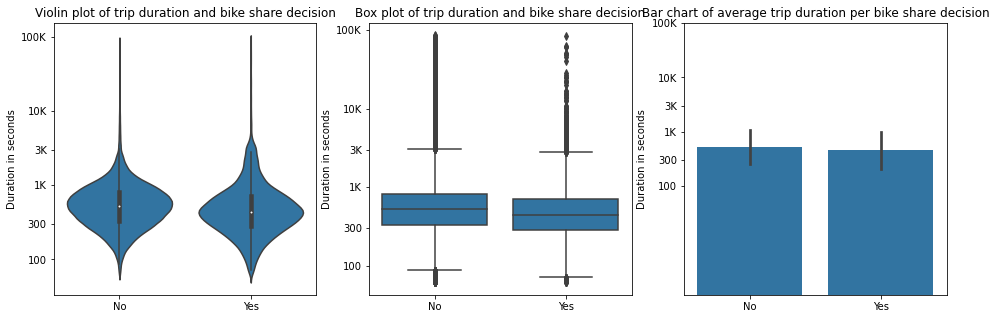

In [41]:
# bivariate plots of gender and trip duration
x=bike_systems['bike_share_for_all_trip']
violin_title = 'Violin plot of trip duration and bike share decision'
box_title = 'Box plot of trip duration and bike share decision'
bar_title = 'Bar chart of average trip duration per bike share decision'
viobox(x, violin_title, box_title, bar_title)

<h4 style='color:red'> Observation </h4>

> The distribution of trip duration per decision to use bike share for the whole trip is similar. Those who use bike share for the whole trip spend slightly shorter time but there is no notable difference.

### Question 10:
> How many customers and subscribers start trips in the highest starting stations and end trips in the highest ending stations?
#### Visualization:
A facet grid of bar charts will be used to show this relationship. First a dataframe of the bike stations that start the most trips is created.

In [42]:
# find bike stations that start more than 1500 trips
idx = np.sum(bike_systems['start_station_name'].value_counts() > 1500)

In [43]:
# create a list of the station names
most_stations = bike_systems['start_station_name'].value_counts().index[:idx]

In [44]:
# select these top stations
start_subset = bike_systems.loc[bike_systems['start_station_name'].isin(most_stations)]

In [46]:
# create dataframe ordered by stations with highest number of trips
start_order = start_subset.groupby('start_station_id').count().sort_values('start_station_name', ascending=False)

<Figure size 1152x720 with 0 Axes>

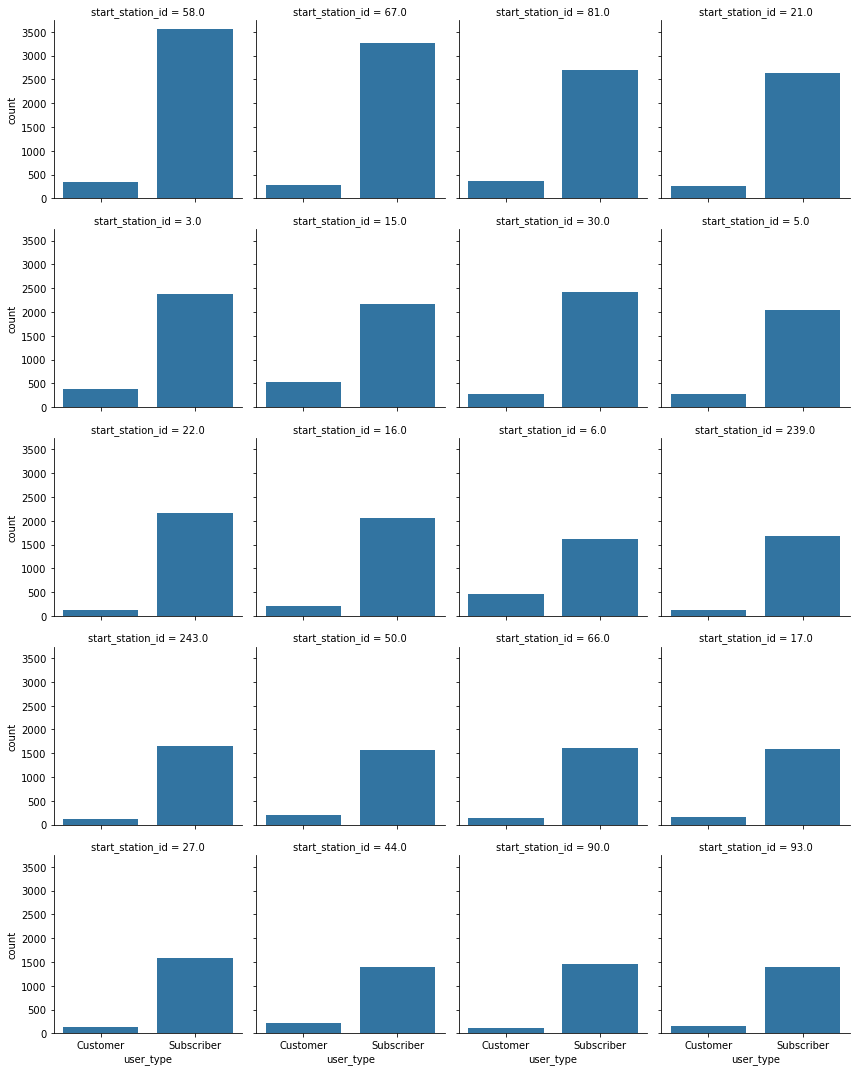

In [49]:
# create a facet grid to see user type count for these stations
plt.figure(figsize=[16,10])
g = sb.FacetGrid(start_subset,col='start_station_id', col_wrap=4, col_order=start_order.index, legend_out=True)
g = g.map_dataframe(sb.countplot,"user_type",color=color);

In [50]:
# find bike stations that end more than 1500 trips
idx = np.sum(bike_systems['end_station_name'].value_counts() > 1500)

In [51]:
# create a list of the station names
most_end_stations = bike_systems['end_station_name'].value_counts().index[:idx]

In [52]:
# select these top stations
end_subset = bike_systems.loc[bike_systems['end_station_name'].isin(most_end_stations)]

In [53]:
# create dataframe ordered by stations with highest number of trips
end_order = end_subset.groupby('end_station_id').count().sort_values('end_station_name', ascending=False)

<Figure size 1152x720 with 0 Axes>

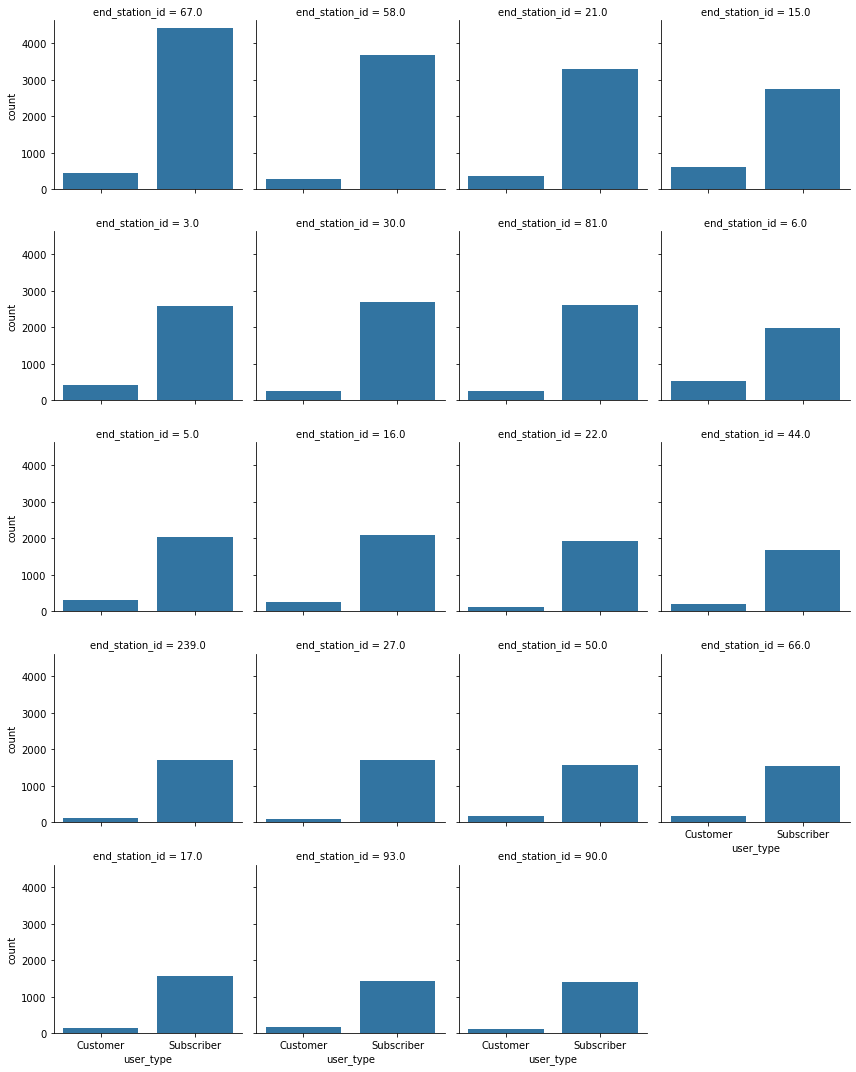

In [54]:
# create a facet grid to see user type count for these stations
plt.figure(figsize=[16,10])
g = sb.FacetGrid(end_subset,col='end_station_id', col_wrap=4, col_order=end_order.index, legend_out=True)
g = g.map_dataframe(sb.countplot,"user_type",color=color);

<h4 style='color:red'> Observation </h4>

> Earlier in the univariate exporations, we saw that subscribers were the most users. This facet grid is arranged by stations with the most starting number of trips.

> Stations with more subscribers, and generally, more users, start the most number of trips. Hence, there is a direct relationship between the number of users and number of trips started in a station, as expected.

> The same thing applies to destination bike stations.

### Question 12:
> What is the demography of users?
#### Visualization:

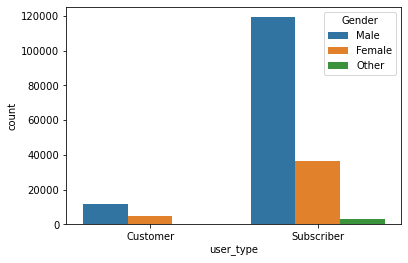

In [55]:
# create bar plot of age demography of the different user types
sb.countplot(data=bike_systems, x="user_type", hue='member_gender', hue_order=['Male','Female','Other'])
plt.legend(title='Gender')

<h4 style='color:red'> Observation </h4>

> There are meny more male users, both as customers and as subscribers

### Question 13:
> When do people take longer trips?
#### Visualization:
In order to avoid overplotting, the start times were changed into days and the trip duration per day was plotted at random

In [56]:
# create column for day only
bike_systems['day'] = pd.to_datetime(bike_systems['start_time'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%d-%b-%Y')

In [57]:
# days were picked at random from these values
bike_systems.day.value_counts()

28-Feb-2019    9829
20-Feb-2019    9667
21-Feb-2019    9536
19-Feb-2019    9467
07-Feb-2019    9234
22-Feb-2019    9204
06-Feb-2019    9057
11-Feb-2019    8681
05-Feb-2019    8486
12-Feb-2019    8473
27-Feb-2019    7715
15-Feb-2019    7288
25-Feb-2019    7033
14-Feb-2019    6598
08-Feb-2019    6356
01-Feb-2019    6133
18-Feb-2019    5647
04-Feb-2019    5491
23-Feb-2019    5451
26-Feb-2019    5387
24-Feb-2019    4497
17-Feb-2019    4225
16-Feb-2019    3993
10-Feb-2019    3960
02-Feb-2019    3231
13-Feb-2019    3202
03-Feb-2019    2841
09-Feb-2019    2730
Name: day, dtype: int64

In [58]:
# select dataframe of the selected date
check = bike_systems.query('day == "09-Feb-2019"')

In [59]:
# define line plot
def line_plot(dataframe):
    plt.figure(figsize=[16,8])
    sb.lineplot(data=dataframe,
                 x=dataframe['start_time'],
                 y=dataframe['duration_sec'],
                 linewidth=1.0)
    #set plot size, title, and legend position
    plt.title('Trip duration per time')

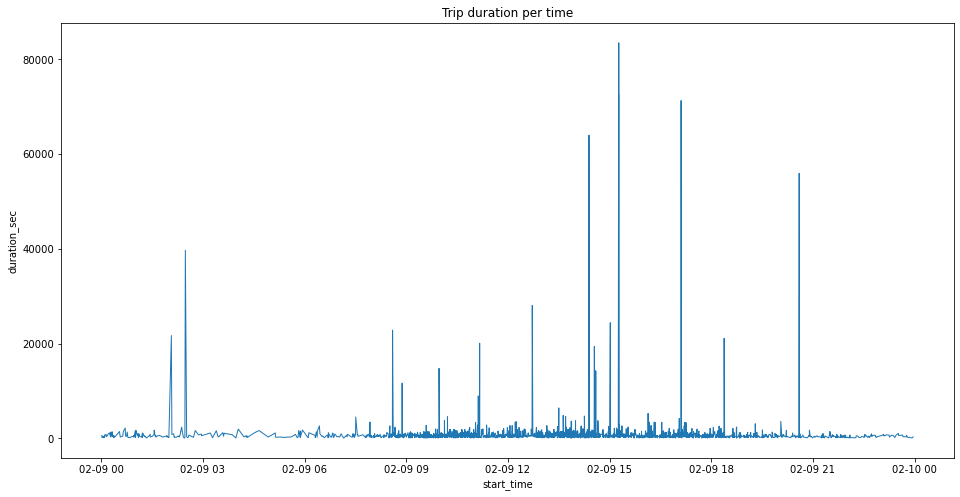

In [60]:
line_plot(check)

<h4 style='color:red'> Observation </h4>

> On some days, e.g 9th Feb and 28th Feb, long trips are taken before dawn and this needs to be investigated.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Although subscribers make up the bulk of the customer base, they spend less time on trips than customers. They are however very active because they start and end the most number of trips.

Gender and the decision to share bikes throughout the trip does not significantly affect trip duration. There are more male customers than other genders, and more male subscribers too.

Some long trip durations (>40,00 seconds) seem to have happened before dawn on certain days like the 9th and 28th of February. This may need further investigation to ascertain the accuracy of the entries. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

While trip duration and age of users, at first glance, may not seem to be relatable, the heat map correlation showed that most adults (20 to 40 years old) spend roughly 300 to 1000 seconds on trips, meanwhile trips could last as long as 80,000 seconds.

## Multivariate Exploration
### Question 14:
> What is the relationship between trip duration, user type and gender?
#### Visualize:

In [61]:
# create column for log scale of trip duration
bike_systems['log_duration'] = bike_systems['duration_sec'].apply(log_trans)

C:\Users\iolowoye\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\iolowoye\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


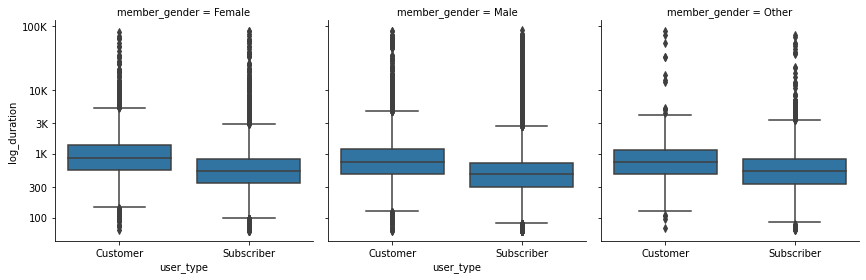

In [62]:
# create box plot
g = sb.FacetGrid(data = bike_systems, col = 'member_gender', size = 4)
g.map(sb.boxplot, 'user_type', 'log_duration')
ticks = [100, 300, 1000, 3000, 10000, 100000]
labels = ['100', '300', '1K', '3K', '10K', '100K']
plt.yticks(log_trans(ticks), labels)
plt.ylabel('Duration in seconds')
plt.xlabel(None);

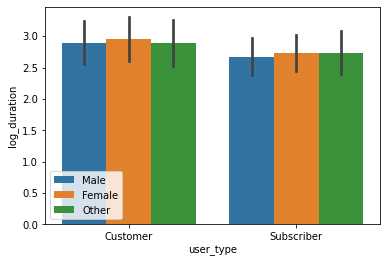

In [63]:
# create clustered bar chart
ax = sb.barplot(data = bike_systems, x='user_type', y='log_duration', hue='member_gender', hue_order=['Male','Female','Other'], ci='sd')
ax.legend(loc=0)

<h4 style='color:red'> Observation </h4>

> Subscribers spend less time on trips regardless of gender

### Question 15:
> What is the relationship between age, user type and gender?
#### Visualize:

C:\Users\iolowoye\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\iolowoye\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


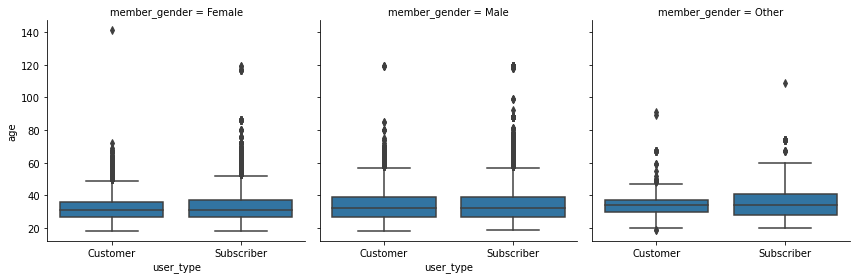

In [64]:
# create box plot
g = sb.FacetGrid(data = bike_systems, col = 'member_gender', size = 4)
g.map(sb.boxplot, 'user_type', 'age')
plt.yticks()
plt.ylabel('Duration in seconds')
plt.xlabel(None);

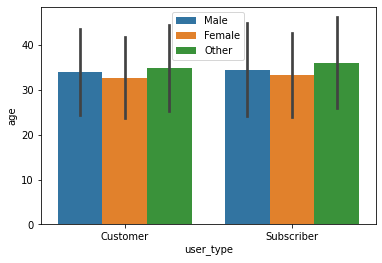

In [65]:
# create clustered bar chart
ax = sb.barplot(data = bike_systems, x='user_type', y='age', hue='member_gender', hue_order=['Male','Female','Other'], ci='sd')
ax.legend(loc=0)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The relationship between user type, trip duration and gender/age was strengthened. Earlier, we observed that customers took the longest trips. Now we know that female customers took the longest trips.

### Were there any interesting or surprising interactions between features?

> The average age of all user types regardless of gender is above 30 years old.

## Conclusions
> To guide the marketing strategy, emphasis should be placed on getting bikes to the stations with high demand.

> More than 70% of users are male and a campaign to drive in more female users and other genders is needed for diversity, equity and inclusion.

> Also, promos can be run for subcribers who make up more than 90% of the customer base to encourage them to take longer trips.